In [1]:
#Websites I used to help clean up
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
#https://www.statology.org/pandas-combine-two-columns/
#https://www.geeksforgeeks.org/replace-nan-with-blank-or-empty-string-in-pandas/
#https://www.geeksforgeeks.org/how-to-convert-integers-to-floats-in-pandas-dataframe/
#https://saturncloud.io/blog/how-to-sum-two-columns-in-a-pandas-dataframe/

In [2]:
#import libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read file
injury_file = Path("injury_data.csv")
injury_df = pd.read_csv(injury_file)

In [4]:
#make a copy 
ak_injury_df=injury_df.copy()

In [5]:
#Adding relevant columns and removing non-relevant columns
ak_injury_df=ak_injury_df.drop(['Height', 'Weight'], axis=1)
ak_injury_df['Total Days Missed']= ak_injury_df['Total Playoff Games Missed']+ak_injury_df['Total  Regular Season Games Missed']
ak_injury_df['Total Regular Season Games Missed']= ak_injury_df['Total  Regular Season Games Missed']

In [52]:
#cleaning up data frame for easy reading/easy analysis
ak_injury_df = ak_injury_df[['Playerid', 'Season', 'Part Specific', 'Injury Type', 'Surgery?', 'Time of Year', 'Total Regular Season Games Missed', 'Total Playoff Games Missed', 'Body Part', 'Side', 'Total Days Missed']].fillna('')
ak_injury_df=ak_injury_df[['Playerid', 'Season', 'Side', 'Body Part', 'Part Specific', 'Injury Type', 'Surgery?', 'Time of Year', 'Total Regular Season Games Missed', 'Total Playoff Games Missed', 'Total Days Missed']]
ak_injury_df['Total Playoff Games Missed'] = ak_injury_df['Total Playoff Games Missed'].astype(float) 
ak_injury_df['Total Regular Season Games Missed'] = pd.to_numeric(ak_injury_df['Total Regular Season Games Missed'], errors='coerce')
ak_injury_df['Total Days Missed']=pd.to_numeric(ak_injury_df['Total Days Missed'], errors= 'coerce')

#There is one spasm that was marked blank for if they got surgery- I replaced it with a No (DATA ASSUMPTION)
ak_injury_df['Surgery?'] = ak_injury_df['Surgery?'].replace({'No ': 'No'})

ak_injury_df.head()

,Playerid,Season,Side,Body Part,Part Specific,Injury Type,Surgery?,Time of Year,Total Regular Season Games Missed,Total Playoff Games Missed,Total Days Missed
0,Player1,2005-06,,head,jaw,fracture,Yes,Regular season,10.0,0.0,10.0
1,Player1,2006-07,,,,illness,No,Regular season,1.0,0.0,1.0
2,Player1,2006-07,R,knee,,soreness,No,Regular season,1.0,0.0,1.0
3,Player1,2007-08,R,knee,,effusion,No,Regular season,10.0,0.0,10.0
4,Player1,2007-08,R,knee,,debridement,Yes,Regular season,65.0,0.0,65.0


Injured Body Parts vs. Number of Days Missed

In [7]:
#Days Missed Based on Body Part
ak_body_part_days_missed_counts=ak_injury_df.groupby('Body Part')['Total Days Missed'].count()
ak_body_part_days_missed_max=ak_injury_df.groupby('Body Part')['Total Days Missed'].max()
ak_body_part_days_missed_min=ak_injury_df.groupby('Body Part')['Total Days Missed'].min()
ak_body_part_days_missed_mean=ak_injury_df.groupby('Body Part')['Total Days Missed'].mean()
ak_body_part_days_missed_median=ak_injury_df.groupby('Body Part')['Total Days Missed'].median()

ak_body_part_summary=pd.DataFrame({"Count": ak_body_part_days_missed_counts,
                                   "Minimum": ak_body_part_days_missed_min,
                                   "Maximum": ak_body_part_days_missed_max,
                                   "Mean": ak_body_part_days_missed_mean,
                                   "Median": ak_body_part_days_missed_median
                                  })

ak_body_part_summary.style.highlight_max()

,Count,Minimum,Maximum,Mean,Median
Body Part,,,,,
,4097,0.000000,52.000000,1.352697,1.000000
abdominal,201,0.000000,46.000000,4.925373,1.000000
ankle,4601,0.000000,87.000000,2.557053,1.000000
arm,85,0.000000,52.000000,2.529412,0.000000
back,2133,0.000000,82.000000,2.666198,1.000000
body,30,0.000000,1.000000,0.300000,0.000000
chest,84,0.000000,82.000000,7.273810,1.000000
ear,1,0.000000,0.000000,0.000000,0.000000
elbow,422,0.000000,43.000000,2.372038,0.000000


Text(0.5, 1.0, 'Boxplots of Games Missed by Body Part Injured')

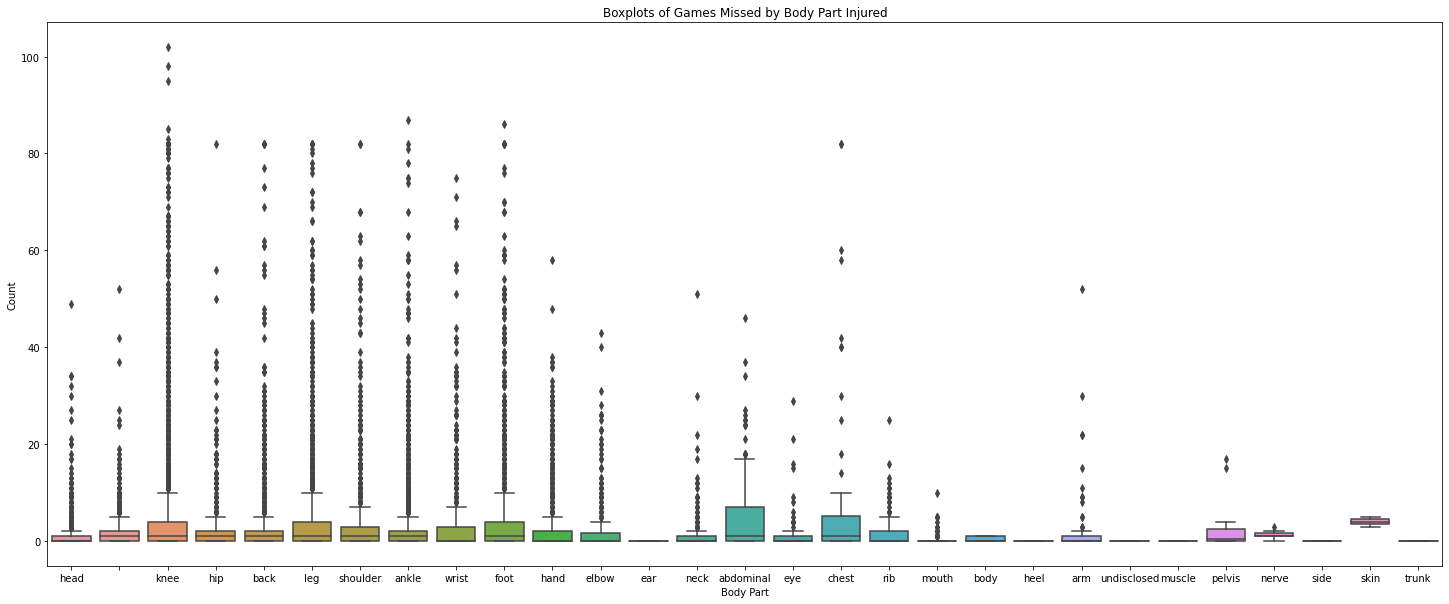

In [8]:
###Injury Part by Number of Games Missed

#How to make multiple boxplots
fig, ax = plt.subplots(figsize=(25, 10))

sns.boxplot(x = 'Body Part', 
            y = 'Total Days Missed', 
            data = ak_injury_df)

ax.set_xlabel('Body Part')
ax.set_ylabel('Count')
ax.set_title('Boxplots of Games Missed by Body Part Injured')

In [68]:
#From ChatGPT

# Filter the DataFrame to include only injuries with Total Days Missed greater than 0
filtered_injuries = ak_injury_df[ak_injury_df['Total Days Missed'] > 0.0]

# Group by 'Body Part' and calculate the count of injuries
ak_number_of_injuries = filtered_injuries.groupby('Body Part').size()

# Calculate the total number of entries (injuries) for each body part
ak_number_of_entries = ak_injury_df.groupby('Body Part').size()

# Calculate the ratio of the number of injuries with Total Days Missed > 0 to the total number of entries for each body part
ak_ratio_number_injuries = ak_number_of_injuries / ak_number_of_entries
ak_ratio_number_injuries.sort_values()


Body Part
mouth          0.209581
eye            0.286765
body           0.300000
head           0.337971
arm            0.376471
hand           0.398496
elbow          0.414692
neck           0.457565
rib            0.483696
wrist          0.495868
pelvis         0.500000
hip            0.520833
shoulder       0.525888
ankle          0.526076
chest          0.559524
back           0.586223
leg            0.597997
               0.600928
knee           0.606728
foot           0.607466
abdominal      0.621891
nerve          0.833333
skin           1.000000
ear                 NaN
heel                NaN
muscle              NaN
side                NaN
trunk               NaN
undisclosed         NaN
dtype: float64

Text(0.5, 1.0, 'Ratio of Injuries with Total Days Missed > 0')

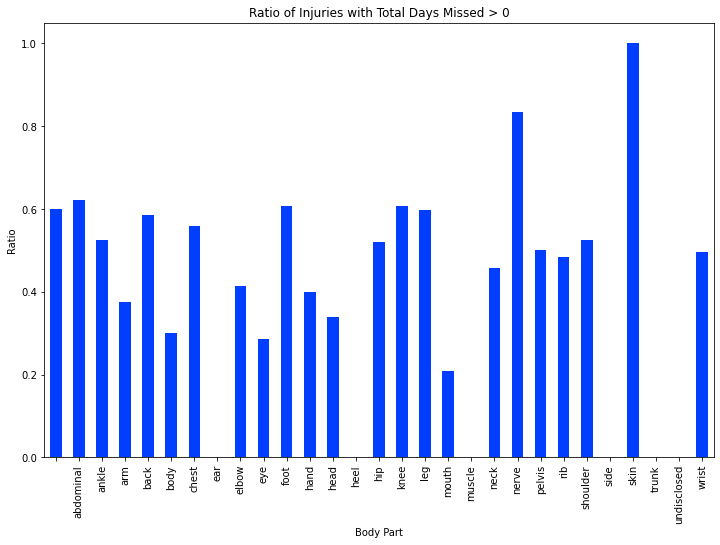

In [70]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
ak_ratio_number_injuries.plot(kind="bar")
plt.xlabel('Body Part')
plt.ylabel('Ratio')
plt.title('Ratio of Injuries with Total Days Missed > 0')

Injuried Body Part vs. Number of Surgeries

In [12]:
#Days Missed Based on Body Part
ak_surgery_days_missed_counts=ak_injury_df.groupby('Body Part')['Surgery?'].value_counts()

#DataFrame from ChatGPT
ak_injury_df.pivot_table(index = 'Body Part', 
                   columns = 'Surgery?', 
                   values = 'Total Days Missed', 
                   aggfunc = ['count', 'max', 'min', 'median', 'mean']).style.highlight_max()

In [23]:
#Code from ChatGPT

yes_counts = ak_surgery_days_missed_counts.loc[:, 'Yes']
no_counts = ak_surgery_days_missed_counts.loc[:, 'No']

# Calculate the ratio of 'Yes' to 'No' for each 'Body Part'
ratio = yes_counts / no_counts

# If desired, fill any NaN values with 0
ratio = ratio.fillna(0)
ratio

Body Part
               0.007129
abdominal      0.135593
ankle          0.013210
arm            0.024096
back           0.015231
body           0.000000
chest          0.200000
ear            0.000000
elbow          0.029268
eye            0.046154
foot           0.058049
hand           0.101906
head           0.060764
heel           0.000000
hip            0.030872
knee           0.105249
leg            0.019021
mouth          0.336000
muscle         0.000000
neck           0.003704
nerve          0.000000
pelvis         0.000000
rib            0.000000
shoulder       0.061422
side           0.000000
skin           0.000000
trunk          0.000000
undisclosed    0.000000
wrist          0.094033
Name: Surgery?, dtype: float64

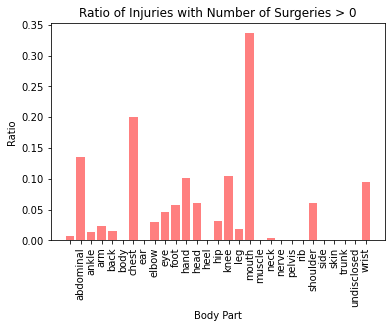

In [71]:
#From ChatGPT

# Reset the index of the ratio Series
ratio_reset_index = ratio.reset_index()

# Plot the bar chart
plt.bar(range(len(ratio_reset_index)), ratio_reset_index['Surgery?'], color='r', alpha=0.5, align="center")

# Set the x-ticks to be the body parts
plt.xticks(range(len(ratio_reset_index)), ratio_reset_index['Body Part'], rotation=90)

plt.xlabel('Body Part')
plt.ylabel('Ratio')
plt.title('Ratio of Injuries with Number of Surgeries > 0')

# Display the plot
plt.show()


Text(0.5, 1.0, 'Number of Surgeries by Body Part')

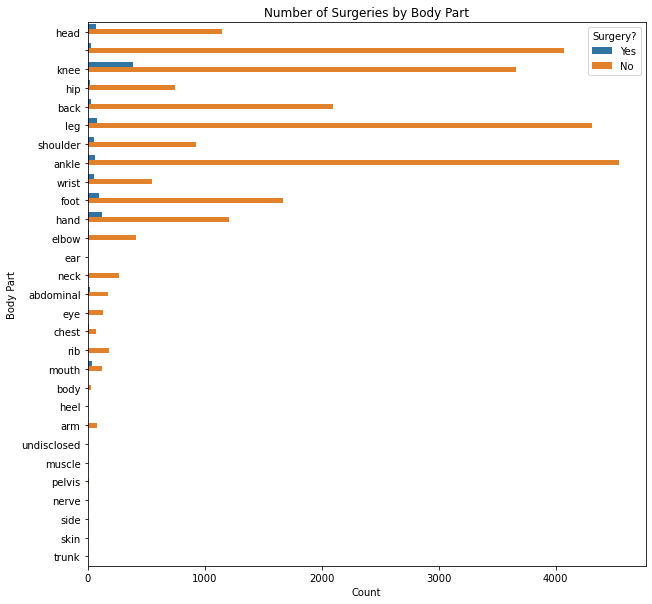

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))


sns.countplot(y = 'Body Part', 
              hue = 'Surgery?', 
              data = ak_injury_df)

sns.set_palette("bright")
ax.set_ylabel('Body Part')
ax.set_xlabel('Count')
ax.set_title('Number of Surgeries by Body Part')